# 07wk-027: 체중감량, 의사결정나무

최규빈  
2023-10-16

# 1. 강의영상

[????](????)

# 2. Imports

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn.tree
import graphviz 

# 3. Data

In [2]:
# # 데이터 크기 설정
# n = 10000

# # 무작위로 복용 여부와 운동량을 생성
# Supplement = np.random.choice([True, False], n)
# Exercise = np.random.choice([False, True], n)

# # 체중 감량 여부를 계산 (이 부분은 수정하지 않습니다)

# # 연속형 변수 생성
# Weight_Loss = np.where(
#     (~Supplement & (~Exercise)),
#     np.random.normal(loc=0, scale=1, size=n),  # 낮은 운동량에서 체중 감량
#     np.where(
#         (Supplement & (Exercise)),
#         np.random.normal(loc=15.00, scale=1, size=n),  # 높은 운동량에서 체중 감량
#         np.where(
#             (~Supplement & (Exercise)),
#             np.random.normal(loc=5.00, scale=1, size=n),  # 낮은 운동량에서 체중 증가
#             np.random.normal(loc=0.5, scale=1, size=n)   # 높은 운동량에서 체중 증가
#         )
#     )
# )

# # 데이터프레임 생성
# df = pd.DataFrame({
#     'Supplement': Supplement,
#     'Exercise': Exercise,
#     'Weight_Loss': Weight_Loss
# })
df = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/main/posts/weightloss.csv')

In [3]:
df.pivot_table(index='Supplement',columns='Exercise',values='Weight_Loss')

`-` 운동과 체중감량보조제를 병행하면 시너지가 나는 것 같음

# 4. 분석

`-` 분석1: 모형을 아래와 같이 본다.

-   ${\bf X}$: `Supplement`, `Exercise`
-   ${\bf y}$: `Weight_Loss`

In [4]:
# step1
X = df[['Supplement','Exercise']]
y = df['Weight_Loss']
# step2 
predictr = sklearn.tree.DecisionTreeRegressor()
# step3
predictr.fit(X,y)
# step4 
yhat = predictr.predict(X)

In [5]:
df.assign(yhat = yhat)

In [6]:
df.assign(yhat = yhat).pivot_table(index='Supplement',columns='Exercise',values='yhat')

In [7]:
predictr.score(X,y)

# 5. 시각화

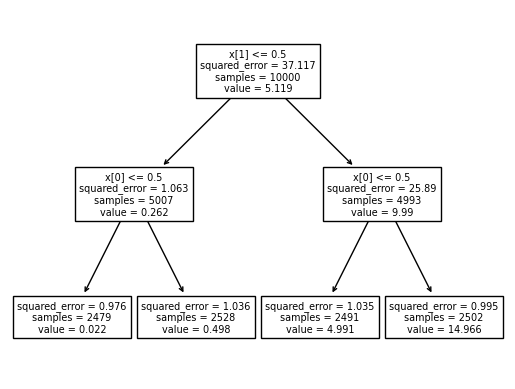

In [8]:
sklearn.tree.plot_tree(predictr)

In [17]:
print(sklearn.tree.export_text(predictr))

|--- feature_1 <= 0.50
|   |--- feature_0 <= 0.50
|   |   |--- value: [0.02]
|   |--- feature_0 >  0.50
|   |   |--- value: [0.50]
|--- feature_1 >  0.50
|   |--- feature_0 <= 0.50
|   |   |--- value: [4.99]
|   |--- feature_0 >  0.50
|   |   |--- value: [14.97]


In [14]:
dot_data = sklearn.tree.export_graphviz(predictr, 
                      feature_names=predictr.feature_names_in_,  
#                      class_names=predictr.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 